In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")

results_list = []

for user in target_users:
    counter = 1
    oldest_tweet = None
    
    for x in range (1, 6):
        public_tweets = api.user_timeline(user, page=x, max_id=oldest_tweet)
        
        for tweet in public_tweets:
            text = tweet["text"]
            date = tweet["created_at"]
            
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neg = results["neg"]
            neu = results["neu"]
            
            oldest_tweet = tweet["id"] - 1
            
            results_list.append({"Username": user, 
                                 "Date": date,
                                 "Text": text, 
                                 "Compound": compound, 
                                 "Positive": pos, 
                                 "Negative": neg, 
                                 "Neutral": neu, 
                                 "Tweets Ago": counter
                                })
            
            counter += 1

In [3]:
results_df = pd.DataFrame(results_list).reset_index(drop=True)
results_df = results_df[["Username", "Date", "Tweets Ago", "Text", "Compound", "Positive", "Neutral", "Negative"]]
results_df

,Username,Date,Tweets Ago,Text,Compound,Positive,Neutral,Negative
0,@BBC,Tue Jul 31 20:02:08 +0000 2018,1,The story of a young girl's choice between Oxf...,0.0000,0.000,1.000,0.000
1,@BBC,Tue Jul 31 19:01:03 +0000 2018,2,Drama series telling the story of a dysfunctio...,0.5859,0.192,0.808,0.000
2,@BBC,Tue Jul 31 18:02:06 +0000 2018,3,How Australia's first gay imam is 'saving live...,0.0000,0.000,1.000,0.000
3,@BBC,Tue Jul 31 16:33:01 +0000 2018,4,RT @bbcwritersroom: Writer Debbie Horsfield's ...,0.0000,0.000,1.000,0.000
4,@BBC,Tue Jul 31 16:01:02 +0000 2018,5,The Old Bridge in Mostar is one of Bosnia-Herz...,0.0000,0.000,1.000,0.000
5,@BBC,Tue Jul 31 15:19:43 +0000 2018,6,"RT @bbcmusic: ""Hopefully my little messages fo...",0.7650,0.266,0.734,0.000
6,@BBC,Tue Jul 31 14:02:05 +0000 2018,7,Congratulations John! 🎓 A 95-year-old man has ...,0.6360,0.189,0.811,0.000
7,@BBC,Tue Jul 31 13:00:23 +0000 2018,8,Have you ever spotted hidden messages in the H...,0.0000,0.000,1.000,0.000
8,@BBC,Tue Jul 31 11:41:04 +0000 2018,9,RT @BBCEarth: In formation 🙌\n\nLet's celebrat...,0.7717,0.242,0.758,0.000
9,@BBC,Tue Jul 31 11:38:00 +0000 2018,10,Tunnelling work is almost set to begin on Lond...,0.6236,0.203,0.797,0.000


In [4]:
BBC = results_df[results_df["Username"] == "@BBC"]

CBS = results_df[results_df["Username"] == "@CBS"]

CNN = results_df[results_df["Username"] == "@CNN"]

FOX = results_df[results_df["Username"] == "@FoxNews"]

NYT = results_df[results_df["Username"] == "@nytimes"]


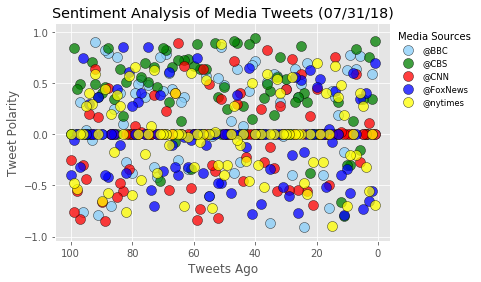

In [19]:
plt.scatter(BBC["Tweets Ago"], BBC["Compound"], s=100, c="lightskyblue", edgecolor="black", label="@BBC", marker="o", alpha=0.75)
plt.scatter(CBS["Tweets Ago"], CBS["Compound"], s=100, c="green", edgecolor="black", label="@CBS", marker="o", alpha=0.75)
plt.scatter(CNN["Tweets Ago"], CNN["Compound"], s=100, c="red", edgecolor="black", label="@CNN", marker="o", alpha=0.75)
plt.scatter(FOX["Tweets Ago"], FOX["Compound"], s=100, c="blue", edgecolor="black", label="@FoxNews", marker="o", alpha=0.75)
plt.scatter(NYT["Tweets Ago"], NYT["Compound"], s=100, c="yellow", edgecolor="black", label="@nytimes", marker="o", alpha=0.75)

plt.title("Sentiment Analysis of Media Tweets (07/31/18)")

plt.xlim([BBC["Tweets Ago"].max()+5,BBC["Tweets Ago"].min()-5])

plt.yticks(np.arange(-1, 1.25, 0.5))

plt.ylabel("Tweet Polarity")

plt.xlabel("Tweets Ago")

plt.legend(bbox_to_anchor=(1,1), loc="upper left", fontsize="small", mode="Expanded", numpoints=1, scatterpoints=1, title="Media Sources", labelspacing=0.5, frameon=False)

In [20]:
plt.show()

In [21]:
users_mean = []
users_name = []

BBC_mean = BBC["Compound"].mean()
BBC_name = BBC["Username"]
users_mean.append(BBC_mean)
users_name.append(BBC_name[0])

CBS_mean = CBS["Compound"].mean()
CBS_name = CBS["Username"]
users_mean.append(CBS_mean)
users_name.append(CBS_name[100])

CNN_mean = CNN["Compound"].mean()
CNN_name = CNN["Username"]
users_mean.append(CNN_mean)
users_name.append(CNN_name[200])

FOX_mean = FOX["Compound"].mean()
FOX_name = FOX["Username"]
users_mean.append(FOX_mean)
users_name.append(FOX_name[300])

NYT_mean = NYT["Compound"].mean()
NYT_name = NYT["Username"]
users_mean.append(NYT_mean)
users_name.append(NYT_name[400])

x_axis = np.arange(len(users_mean))

users_mean_df = pd.DataFrame({"Username": users_name, "Mean": users_mean})

Text(0.5,1,'Overall Media Sentiment Based On Tweeter (07/31/18)')

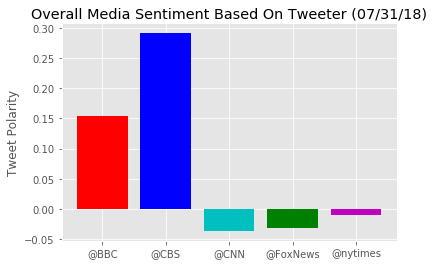

In [22]:
colors = users_mean_df['Username'].map({'@BBC':'r', '@CBS':'b', '@CNN':'c', '@FoxNews':'g', '@nytimes':'m'})
plt.bar(x_axis, users_mean, color=colors)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, users_name)
plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment Based On Tweeter (07/31/18)")
